In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [3]:
x_train,y_train=load_data('train_merge_data_statistics.pkl')

In [4]:
x_train = x_train.replace({'ncRNA_splicing':0})
af_cut_off=0.005
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
x_train = x_train.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_train = x_train.drop(['Func','ExonicFunc'], axis=1) 

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(learning_rate=0.15, min_impurity_decrease=0,
                           min_samples_leaf=0.01, min_weight_fraction_leaf=0,
                           random_state=123, subsample=1)
import shap
clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, min_impurity_decrease=0,
                           min_samples_leaf=0.01, min_weight_fraction_leaf=0,
                           random_state=123, subsample=1)

In [6]:
save_data(clf,'INDELpred_model_fitted.pkl')

### test1_vus score

In [7]:
test1_vus=load_data('test1_vus.pkl')
test1_vus = test1_vus.replace({'ncRNA_splicing':0})
test1_vus.loc[test1_vus['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
test1_vus.loc[test1_vus['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
test1_vus = test1_vus.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
test1_vus = test1_vus.drop(['Func','ExonicFunc'], axis=1) 

In [20]:
test1_vus_score = clf.predict_proba(test1_vus.iloc[:,1:])[:,1]
test1_vus_lab = clf.predict(test1_vus.iloc[:,1:])

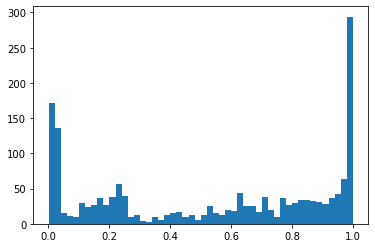

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
hist = plt.hist(test1_vus_score, bins=50,label='vus')


In [21]:
test1_vus_lab

array([0., 0., 0., ..., 1., 1., 0.])

In [24]:
test1_vus_df=pd.DataFrame()
test1_vus_df['id']=test1_vus.iloc[:,0]
test1_vus_df['INDELpred_score'] = test1_vus_score
test1_vus_df['INDELpred']=test1_vus_lab
test1_vus_df.to_csv('test1_vus_indelpred_out.gz',index=False,compression='gzip')